In [15]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp,ttest_rel, anderson_ksamp,normaltest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import numpy as np

# MLPdir

In [16]:
query={'experiment':'mlpdirfit'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full'], data=['lag'])

In [17]:
a=results.exp_df.groupby(['site','drop','full','lag'],as_index=False).sum()
a.drop(columns=['hour'], inplace=True)
len(a)

6000

In [18]:
mlpdir = a[(a['lag']=='12') & (a['drop'] == '0.0') & (a['full']=='[1024, 512]')]
len(mlpdir)
mlpdir.mean()
normaltest(mlpdir['test'])

200

site    6.294650e+04
lag              inf
test    6.785784e+00
val     6.471196e+00
dtype: float64

NormaltestResult(statistic=6.377529633433789, pvalue=0.041222757166224734)

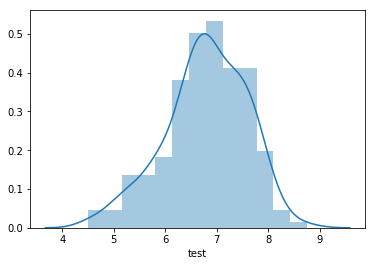

In [19]:
sns.distplot(mlpdir['test'])

# MLP MIMO

In [20]:
query={'experiment':'mlps2sfit2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full', 'activation'], data=['lag'])

In [21]:
a=results.exp_df.groupby(['site','activation','drop','full','lag'],as_index=False).sum()
a.drop(columns=['hour'], inplace=True)

In [22]:
mlpmimo = a[(a['lag']=='12') & (a['drop'] == '0.3') & (a['full']=='[512, 256]')&(a['activation']=='relu')]
len(mlpmimo)
mlpmimo.mean()
normaltest(mlpmimo['test'])

200

site    6.294650e+04
lag              inf
test    7.035190e+00
val     6.756532e+00
dtype: float64

NormaltestResult(statistic=8.757963425240526, pvalue=0.01253811953171938)

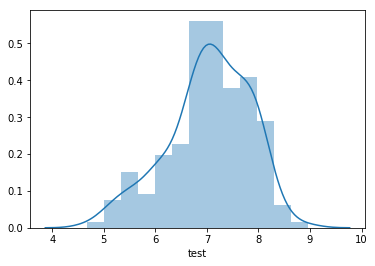

In [23]:
sns.distplot(mlpmimo['test'])

# RNN MIMO

In [24]:
query={'experiment':'rnns2sfit3'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'nlayers', 'full', 'fulldrop'],data=['lag'])

In [25]:
a=results.exp_df.groupby(['site', 'full', 'fulldrop', 'lag', 'drop','neurons', 'nlayers'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)


In [26]:
rnnmimo = a[(a['lag']=='12') & (a['drop'] == '0.4') & (a['full']=='[512]')&(a['neurons']=='32')&(a['fulldrop']=='0.1')]
len(rnnmimo)
rnnmimo.mean()
normaltest(rnnmimo['test'])

200

test    6.909904
val     6.611368
dtype: float64

NormaltestResult(statistic=9.004376401046283, pvalue=0.011084714402985302)

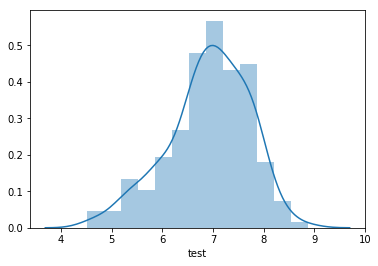

In [27]:
sns.distplot(rnnmimo['test'])

# RNN ED MIMO

In [28]:
query={'experiment':'rnnfit4'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['neuronsD', 'nlayersD', 'drop'], data=['lag'])

In [29]:
a=results.exp_df.groupby(['site', 'drop', 'neuronsD', 'lag','nlayersD'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

In [30]:
rnnedmimo = a[(a['lag']=='18') & (a['drop'] == '0.0') & (a['nlayersD']=='2')&(a['neuronsD']=='196')]
len(rnnedmimo)
rnnedmimo.mean()
normaltest(rnnedmimo['test'])

200

test    6.837617
val     6.521913
dtype: float64

NormaltestResult(statistic=5.297831034167637, pvalue=0.07072787465558275)

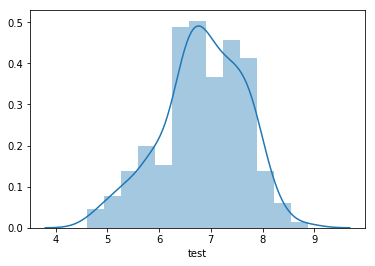

In [31]:
sns.distplot(rnnedmimo['test'])

# CNN MIMO

In [32]:
query={'experiment':'cnns2sfit8'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()
results.retrieve_results_dataframe(query, arch=['filters','strides','kernel_size','drop','full','fulldrop', 'activation_full'], data=['lag'])


In [33]:
a=results.exp_df.groupby(['site','filters','strides','kernel_size','drop','full','fulldrop','lag', 'activation_full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

800

In [34]:
cnnmimo = a[(a['activation_full']=='relu')]
len(cnnmimo)
cnnmimo.mean()
normaltest(cnnmimo['test'])

200

test    6.917261
val     6.595437
dtype: float64

NormaltestResult(statistic=6.958440439148555, pvalue=0.030831443417615494)

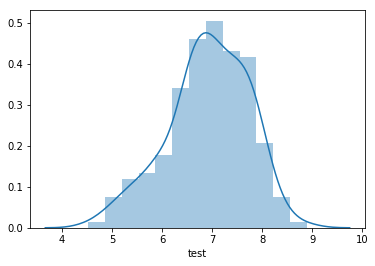

In [35]:
sns.distplot(cnnmimo['test'])

# KNN Dir

In [36]:
query={'experiment':'knndir'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['n_neighbors'], data=['lag','vars'])

In [37]:
a=results.exp_df.groupby(['site','n_neighbors','lag','vars'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

4200

In [38]:
knndir = a[(a['n_neighbors']=='15')&(a['lag']=='6')&(a['vars']=='[0]')]
len(knndir)
knndir.mean()
normaltest(knndir['test'])

200

n_neighbors              inf
lag            3.333333e+197
test            4.909541e+00
val             4.684405e+00
dtype: float64

NormaltestResult(statistic=2.8559343790708334, pvalue=0.23979588671070082)

# TESTS

## Kolmogorov smirnov test de igualdad de distribucion

In [39]:
ks_2samp(mlpdir['test'], knndir['test'])

Ks_2sampResult(statistic=0.685, pvalue=2.950212925432917e-42)

In [22]:
ks_2samp(mlpdir['test'], mlpmimo['test'])

Ks_2sampResult(statistic=0.17500000000000004, pvalue=0.0037224287381419255)

In [23]:
ks_2samp(rnnmimo['test'], mlpmimo['test'])

Ks_2sampResult(statistic=0.09000000000000008, pvalue=0.37665913494839515)

In [24]:
ks_2samp(rnnedmimo['test'], mlpmimo['test'])

Ks_2sampResult(statistic=0.14500000000000007, pvalue=0.026709183504449018)

In [27]:
ks_2samp(cnnmimo['test'], mlpmimo['test'])

Ks_2sampResult(statistic=0.10499999999999998, pvalue=0.20781055046016633)

## Anderson test

In [40]:
anderson_ksamp([mlpdir['test'], knndir['test']])

/home/bejar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

p-value floored: true value smaller than 0.001



Anderson_ksampResult(statistic=138.17670647557296, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

In [41]:
anderson_ksamp([mlpdir['test'], mlpmimo['test']])

/home/bejar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

p-value floored: true value smaller than 0.001



Anderson_ksampResult(statistic=6.6228118434854615, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

In [42]:
anderson_ksamp([rnnmimo['test'], mlpmimo['test']])

Anderson_ksampResult(statistic=0.8351364843447158, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.14851270726509308)

In [43]:
anderson_ksamp([rnnedmimo['test'], mlpmimo['test']])

Anderson_ksampResult(statistic=3.9977510738180158, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.008086438216918273)

In [44]:
anderson_ksamp([cnnmimo['test'], mlpmimo['test']])

Anderson_ksampResult(statistic=0.7703994543101127, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.15822983880418387)

In [45]:
anderson_ksamp([rnnedmimo['test'], rnnmimo['test']])

/home/bejar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

p-value capped: true value larger than 0.25



Anderson_ksampResult(statistic=-0.38011823483648044, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

## T-test equal means

In [28]:
ttest_rel(mlpdir['test'], mlpmimo['test'])

Ttest_relResult(statistic=-30.976842095158002, pvalue=4.658588139988746e-78)

In [29]:
ttest_rel(rnnmimo['test'], mlpmimo['test'])

Ttest_relResult(statistic=-19.598487769176614, pvalue=2.4316422659913687e-48)

In [30]:
ttest_rel(rnnedmimo['test'], mlpmimo['test'])

Ttest_relResult(statistic=-24.840904444398934, pvalue=6.77556614405473e-63)

In [31]:
ttest_rel(cnnmimo['test'], mlpmimo['test'])

Ttest_relResult(statistic=-19.063607014906534, pvalue=8.92008099489803e-47)

## ANOVA analysis

In [125]:
f, p = stats.f_oneway(rnnedmimo['test'], rnnmimo['test'], mlpmimo['test'], mlpdir['test'], cnnmimo['test'])

print ('One-way ANOVA')
print ('=============')

print ('F value:', f)
print ('P value:', p, '\n')


One-way ANOVA
F value: 2.655521375813556
P value: 0.03176326533269973 



In [126]:
matrix = [mlpmimo['test'],rnnmimo['test'],rnnedmimo['test'],mlpdir['test'],cnnmimo['test']]
labels = ['mlpmimo','rnnmimo','rnnedmimo','mlpdir','cnnmimo']
data = np.zeros(0)
groups = []
for m,l in zip(matrix,labels):
    data = np.append(data,m)
    groups.extend([l]*len(m))

mc = MultiComparison(data, groups)
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower  upper  reject
--------------------------------------------------
 cnnmimo    mlpdir  -0.1251  -0.3448 0.0945 False 
 cnnmimo   mlpmimo   0.1179  -0.1006 0.3365 False 
 cnnmimo  rnnedmimo -0.0796  -0.2982 0.1389 False 
 cnnmimo   rnnmimo  -0.0074  -0.2259 0.2112 False 
  mlpdir   mlpmimo   0.2431   0.0234 0.4627  True 
  mlpdir  rnnedmimo  0.0455  -0.1742 0.2651 False 
  mlpdir   rnnmimo   0.1178  -0.1019 0.3374 False 
 mlpmimo  rnnedmimo -0.1976  -0.4161 0.021  False 
 mlpmimo   rnnmimo  -0.1253  -0.3438 0.0932 False 
rnnedmimo  rnnmimo   0.0723  -0.1462 0.2908 False 
--------------------------------------------------
